## IMPORTANT 
### Dette ble laget ved remote import av filer, som komprimeres. Lagd etter plan 16/3

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import xarray as xr
import cartopy.crs as ccrs
import plot_func as f

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
path = '/Users/johannemehren/Desktop/filer/'

ds= xr.open_dataset(path + 'era5_latlon_2006-2018_3030.nc')
ds_regrid = xr.open_dataset(path + 'gridfile_test.nc')

ds1 = xr.open_dataset(path + 'erai_latlon_regrid_2006-2018_3030.nc')
obs = xr.open_dataset(path + 'GPS-RO__CP_LR_5x5_2007-2018.nc')
obs_res = obs.resample(time='M').mean()

FileNotFoundError: [Errno 2] No such file or directory: b'/Users/johannemehren/Desktop/filer/era5_latlon_2006-2018_3030.nc'

In [4]:
# Make EL/LA/neu for ERA5
## New LA 
nina0708_era5 = ds.sel(time=slice('2007-06-01', '2008-07-31'))
nina0708_era5_regrid = ds_regrid.sel(time=slice('2007-06-01', '2008-07-31'))
nina0708_obs = obs_res.sel(time=slice('2007-06-01', '2008-07-31'))

NameError: name 'ds' is not defined

In [5]:
nino1416_era5_regrid = ds_regrid.sel(time=slice('2014-10-01', '2016-06-30'))
nino1416_obs = obs_res.sel(time=slice('2014-10-01', '2016-06-30'))

In [6]:
diff_nina0708 = nina0708_era5_regrid.ctpt - nina0708_obs.CP_T.values

In [7]:
diff_nino1416 = nino1416_era5_regrid.ctpt - nino1416_obs.CP_T.values

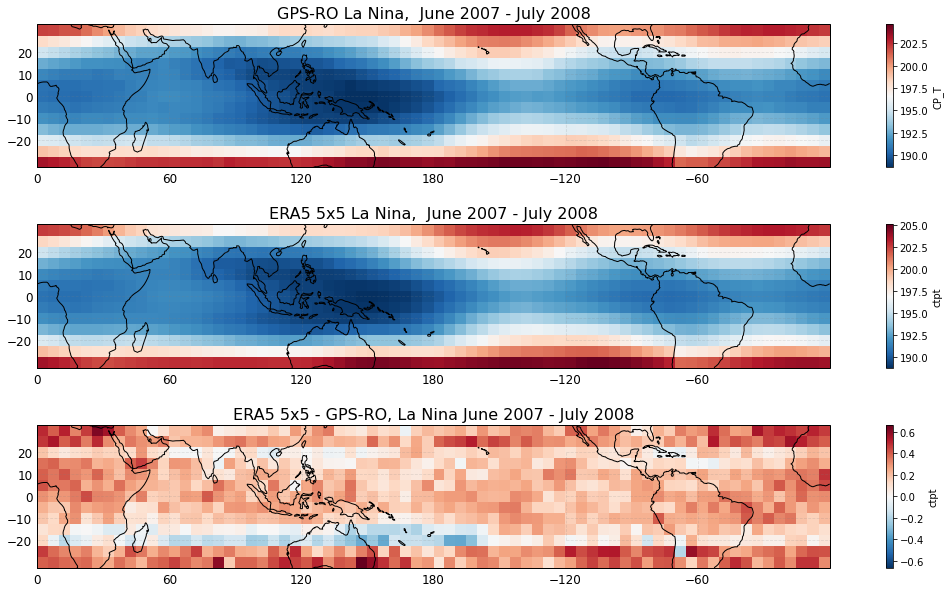

In [8]:
d1 = nina0708_obs.CP_T.mean(axis=0)
d2 = nina0708_era5_regrid.ctpt.mean(axis=0)
d3 = diff_nina0708.mean(axis=0)
tl1 = 'GPS-RO La Nina,  June 2007 - July 2008'
tl2 = 'ERA5 5x5 La Nina,  June 2007 - July 2008'
tl3 = 'ERA5 5x5 - GPS-RO, La Nina June 2007 - July 2008'
vmin = -0.7
vmax = 0.7
t = f.three_plot(d1, d2, d3, tl1, tl2, tl3, vmin, vmax, enso=True)
#t.savefig('diff_era5-gpsro_LA_jun07-jul08.png')

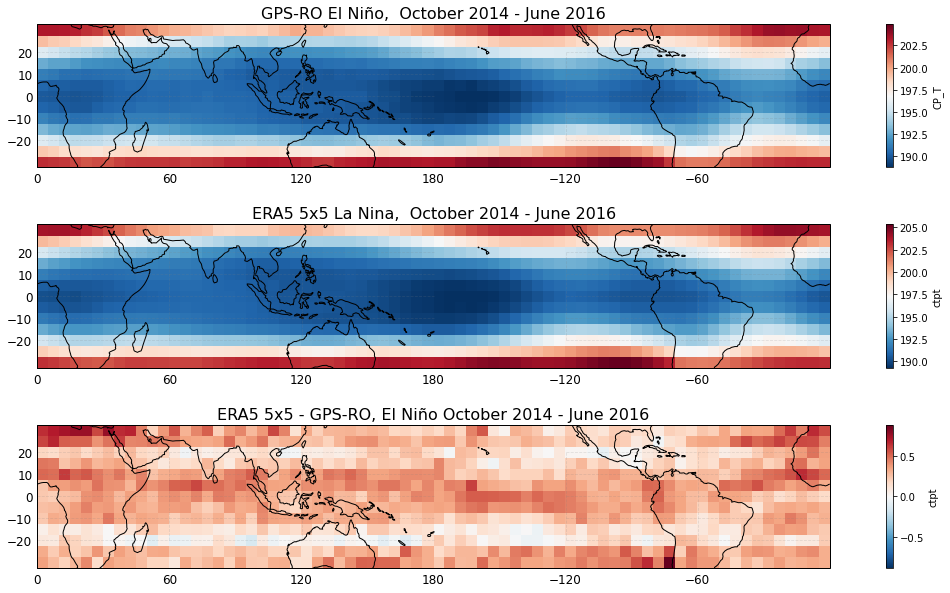

In [9]:
d1 = nino1416_obs.CP_T.mean(axis=0)
d2 = nino1416_era5_regrid.ctpt.mean(axis=0)
d3 = diff_nino1416.mean(axis=0)
tl1 = 'GPS-RO El Niño,  October 2014 - June 2016'
tl2 = 'ERA5 5x5 La Nina,  October 2014 - June 2016'
tl3 = 'ERA5 5x5 - GPS-RO, El Niño October 2014 - June 2016'
vmin = -1
vmax = 1
t = f.three_plot(d1, d2, d3, tl1, tl2, tl3, vmin, vmax, enso=True)
#t.savefig('diff_era5-gpsro_EL_oct14-junl6.png')

In [27]:
test = nina0708_era5_regrid.sel(time=slice('2007-10-01', '2008-06-30'))
time1=test.ctpt[0:3,:,:].mean(axis=0)
time2= test.ctpt[1:4,:,:].mean(axis=0)
time3 = test.ctpt[2:5, :,:].mean(axis=0)
time4 = test.ctpt[3:6,:,:].mean(axis=0)
time5 = test.ctpt[4:7,:,:].mean(axis=0)

obs_max_la = nina0708_obs.sel(time=slice('2007-10-01', '2008-06-30'))
obs1 = obs_max_la.CP_T[0:3,:,:].mean(axis=0)
obs2 = obs_max_la.CP_T[1:4,:,:].mean(axis=0)
obs3 = obs_max_la.CP_T[2:5,:,:].mean(axis=0)
obs4 = obs_max_la.CP_T[3:6,:,:].mean(axis=0)
obs5 = obs_max_la.CP_T[4:7,:,:].mean(axis=0)

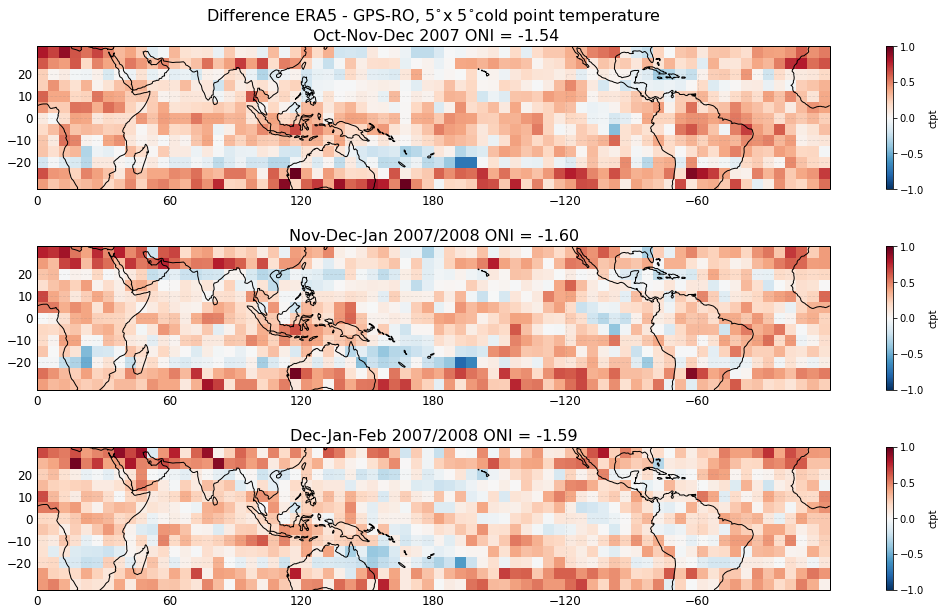

In [28]:
tl1 = 'Difference ERA5 - GPS-RO, 5$^{\circ}$x 5$^{\circ}$cold point temperature \n Oct-Nov-Dec 2007 ONI = -1.54'
tl2 = 'Nov-Dec-Jan 2007/2008 ONI = -1.60'
tl3 = 'Dec-Jan-Feb 2007/2008 ONI = -1.59'

k=f.three_plot(time1 - obs1.values, time2-obs2.values, time3- obs3.values, 
               tl1, tl2, tl3, 
               vmin2=-1, vmax2=1)
#k.savefig('diff_era5-gpsro_5x5_cpt_la0708_ondjf.png')

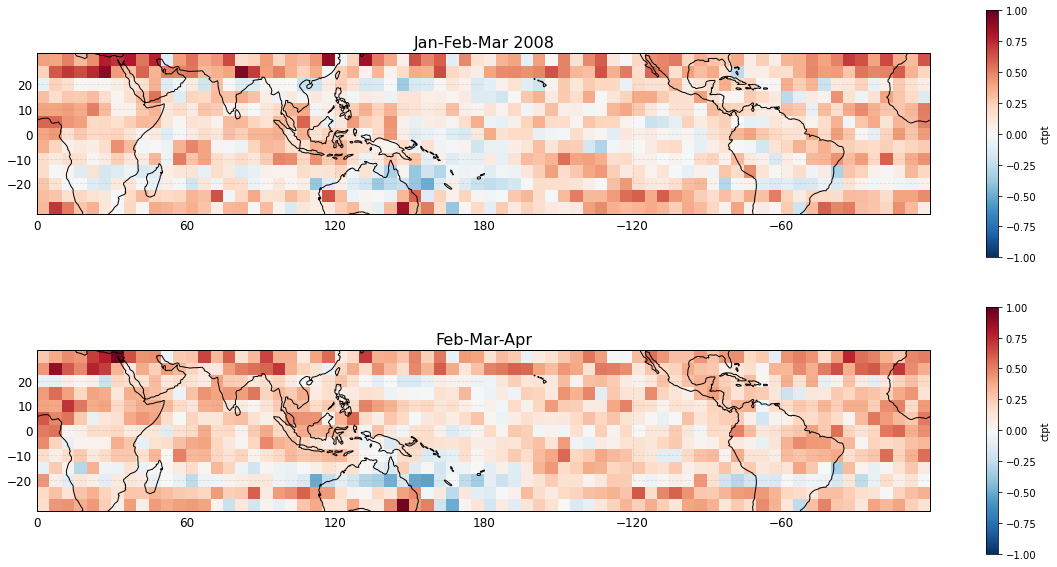

In [30]:
k2 = f.enso_maxmin(time4 - obs4.values, 'Jan-Feb-Mar 2008', time5 - obs5.values, 'Feb-Mar-Apr 2008'
                   , vmin= -1, vmax=1)

In [31]:
era5_max_el = nino1416_era5_regrid.sel(time=slice('2015-10-01', '2016-06-30'))
maxel1=era5_max_el.ctpt[0:3,:,:].mean(axis=0)
maxel2= era5_max_el.ctpt[1:4,:,:].mean(axis=0)
maxel3= era5_max_el.ctpt[2:5, :,:].mean(axis=0)
maxel4 = era5_max_el.ctpt[3:6,:,:].mean(axis=0)
maxel5 = era5_max_el.ctpt[4:7,:,:].mean(axis=0)

obs_max_el = nino1416_obs.sel(time=slice('2015-10-01', '2016-06-30'))
obsel1 = obs_max_el.CP_T[0:3,:,:].mean(axis=0)
obsel2 = obs_max_el.CP_T[1:4,:,:].mean(axis=0)
obsel3 = obs_max_el.CP_T[2:5,:,:].mean(axis=0)
obsel4 = obs_max_el.CP_T[3:6,:,:].mean(axis=0)
obsel5 = obs_max_el.CP_T[4:7,:,:].mean(axis=0)

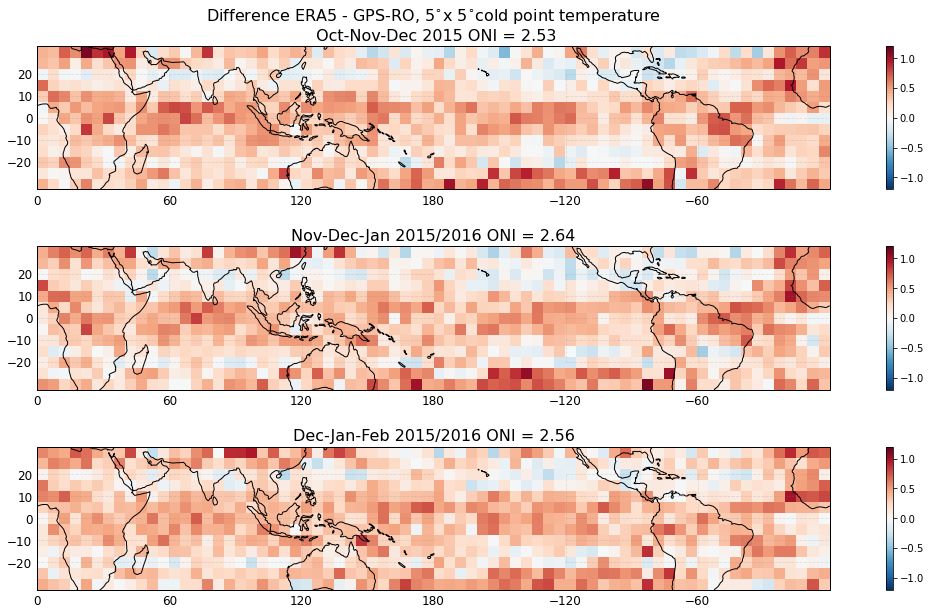

In [38]:
tl1 = 'Difference ERA5 - GPS-RO, 5$^{\circ}$x 5$^{\circ}$cold point temperature \n Oct-Nov-Dec 2015 ONI = 2.53'
tl2 = 'Nov-Dec-Jan 2015/2016 ONI = 2.64'
tl3 = 'Dec-Jan-Feb 2015/2016 ONI = 2.56'
l = f.three_plot(maxel1 - obsel1, maxel2-obsel2, maxel3 - obsel3,
                tl1, tl2, tl3,
                 vmin2=-1.2, vmax2 = 1.2)
#l.savefig('diff_era5-gpsro_5x5_cpt_el1516_ondjf.png')

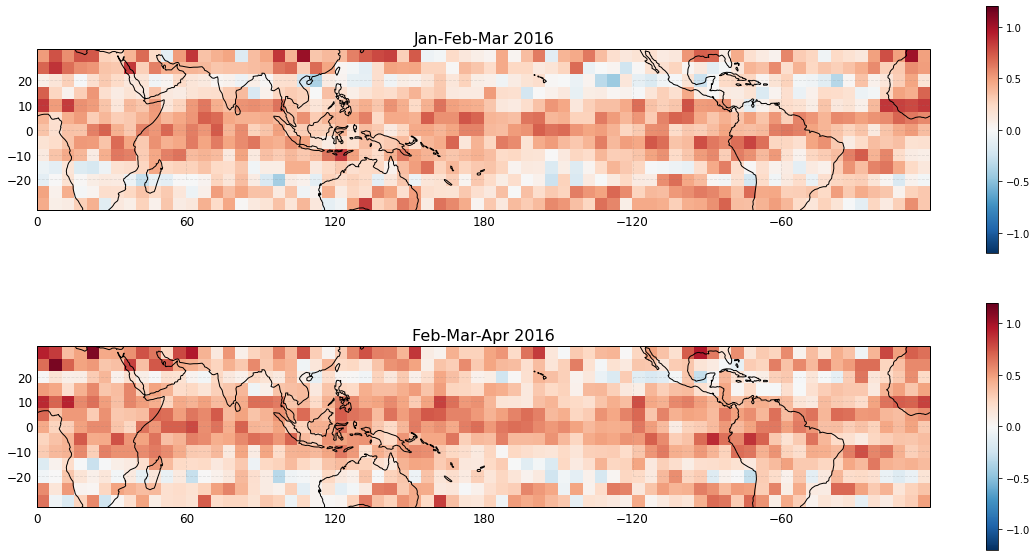

In [37]:
kl = f.enso_maxmin(maxel4 - obsel4, 'Jan-Feb-Mar 2016', maxel5 - obsel5, 'Feb-Mar-Apr 2016',
                  vmin=-1.2, vmax=1.2)

In [14]:
#nina10_era5 = era5_trop.sel(time=slice('2010-10-01', '2011-03-01'))
#nina17_era5 = era5_trop.sel(time=slice('2017-10-01', '2018-03-01'))

In [15]:
#nino09_era5 = era5_trop.sel(time=slice('2009-10-01', '2010-03-01'))
#nino15_era5 = era5_trop.sel(time=slice('2015-10-01', '2016-03-01'))

#neau_era5 = era5_trop.sel(time=slice('2012-10-01', '2014-11-01'))